¡Hola, Andrea!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>
    Se agregaron pruebas de Levene por prueba en el segmento de pruebas de hipótesis para validar varianzas en las pruebas t de medias.
</div> 

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Andrea! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

## Load and verify data

In [1]:
# import libraries

import pandas as pd

# load and read .csv file

games = pd.read_csv("/datasets/games.csv")


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [2]:
# Print general information on the Data set
games.info()
print()
# Print the first 10 columns
print(games.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08 

## Data preprocessing

### Replace column headers with lower case letters

In [3]:

# create variable with new column names
column_names = ["name",
                "platform",
                "release_year",
                "genre",
                "na_sales",
                "eu_sales",
                "jp_sales",
                "other_sales",
                "critic_score",
                "user_score",
                "rating"]

# rename columns using .columns attribute
games.columns = column_names
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Missing values

If necessary, handle missing values. Explain why did you fill out missing values like that or why you decided to leave them blank. Why do you think there are missing values?

In [4]:

# Count missing values in the dataframe

print(games.isna().sum())

# Columns related to score and rating contain most of the missing values. Column release_year also contains missing values. So we filter rows where there is a missing value in this column to visualize closely this data
missing_values = games[games["release_year"].isnull()]
print(missing_values)
print()
# Drop rows with missing values in column release_year, genre & name


games = games.dropna(subset=["release_year", "genre", "name"])

# Estimate mean and median for critic_score & user_score to see if we can replace missing values

# 1. CRITIC_SCORE
critic_score_mean = games["critic_score"].mean().round(2)
print("Critic score mean:", critic_score_mean)
print("Critic score median:", games["critic_score"].median().round(2))

# Replace missing values with median 
games["critic_score"].fillna(games["critic_score"].median().round(2), inplace=True)

# 2. USER_SCORE

# We know user_score contains "tbd", so we replace "tbd" with NaN in the original DataFrame and convert the column to numeric
games.loc[games["user_score"] == "tbd", "user_score"] = None # select the user_score rows there the value is "tbd" and replace with None
games["user_score"] = pd.to_numeric(games["user_score"], errors="coerce") # None values will be replaced with Nan

# Calculate the mean for the numeric values of user_score
raw_mean = games["user_score"].mean().round(2)
print("User score mean:", raw_mean)
print("User score median:", games["user_score"].median().round(2))

# Mean and median are similar for user_Score, missing values can be replaced with the mean_value

# Fill missing values in 'user_score' with the median
games["user_score"].fillna(games["user_score"].median().round(2), inplace=True)

name               2
platform           0
release_year     269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
dtype: int64
                                    name platform  release_year         genre  \
183                      Madden NFL 2004      PS2           NaN        Sports   
377                     FIFA Soccer 2004      PS2           NaN        Sports   
456           LEGO Batman: The Videogame      Wii           NaN        Action   
475           wwe Smackdown vs. Raw 2006      PS2           NaN      Fighting   
609                       Space Invaders     2600           NaN       Shooter   
...                                  ...      ...           ...           ...   
16373  PDC World Championship Darts 2008      PSP           NaN        Sports   
16405                      Freaky Flyers       GC           NaN        Racing   
16448                      

The columns with most missing values are critic_score, user_score, rating & release year. It is possible that the scores and ratings could not be determined for various reasons. For example, there were not enough users to provide an objective score for the game. As for the missing values in "release_year", after filtering these blank rows, we can see that the release year is included for some of the games in the column "name". Nevertheless, not all games with missing release year data include this in the name. It is important to highlight that there are rows in column user_score with the abbreviation "tbd", which stands for "to be determined". This makes sense if we consider that not all games were rated/scored yet. Since the year of release is not crucial data for our analysis, the missing values in this column can be dropped. Also, missing values in "release_year" represent less than 5% of our data (269/16715)  As for the missing values in the scores and rating columns, we can consider assigning a rate/score through the mean or median without biasing our analysis. Keep in mind that this information is missing most likely beause there were not enough users to provide an objective overall score for the game. Missing values in "rating" column were replaced with "RP" (Rating Pending) and missing values in columns "name" and "rating" were dropped since only 4 rows in total were affected thus will not affect our analysis.

### Convert to necessary data type

In [5]:

games["release_year"] = games["release_year"].astype(int)
games.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   release_year  16444 non-null  int64  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  16444 non-null  float64
 9   user_score    16444 non-null  float64
 10  rating        9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Describe columns where data types have been converted and why

Column "release_year" was converted to int because it makes no sense to have years stored as float.


### Pay special attention to "TBD" (to be determined). Explain how this cases will be treated

"tbd" appears in column "user_score". If calculations such as average user score are needed, the average will be estimated considering only games with the available information. This means the data will be filtered by rows where the user score has been determined already.

### Calculate the total sales (the sum of sales across all regions) for each game and place these values in a separate column

In [6]:
games["total_sales"] = games["na_sales"]+ games["eu_sales"] + games["jp_sales"] + games["other_sales"]
games['critic_score'] = games['critic_score'].round(2)
games["total_sales"] = games["total_sales"].round(2)
print(games.head(10))
games.info()



                        name platform  release_year         genre  na_sales  \
0                 Wii Sports      Wii          2006        Sports     41.36   
1          Super Mario Bros.      NES          1985      Platform     29.08   
2             Mario Kart Wii      Wii          2008        Racing     15.68   
3          Wii Sports Resort      Wii          2009        Sports     15.61   
4   Pokemon Red/Pokemon Blue       GB          1996  Role-Playing     11.27   
5                     Tetris       GB          1989        Puzzle     23.20   
6      New Super Mario Bros.       DS          2006      Platform     11.28   
7                   Wii Play      Wii          2006          Misc     13.96   
8  New Super Mario Bros. Wii      Wii          2009      Platform     14.44   
9                  Duck Hunt      NES          1984       Shooter     26.93   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas , cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 

Solamente las variables de score te recomiendo completarlos con la mediana para no sesgar nuestros resultados



<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>


Anteriormente en el paso 2.2 verifiqué la media y la mediana para ambos user y critic score. Ambas son casi iguales, es necesario entonces remplazar los valores ausentes con la mediana? Tengo entendido que si la media es mayor que la mediana, es conveniente remplazar con la mediana, pero en este caso la media y la mediana son casi iguales para ambos user y critic score.


<div class="alert alert-block alert-info">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Andrea! Excelente pregunta, en estos casos en los que trabajamos con distribuciones sesgadas sí se recomienda completar los valores nulos con la mediana en lugar de la media para no sesgar nuestros resultados. 

<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>

Gracias por la observación Tonatiuh, listos los cambios. Remplacé los valores ausentes con la mediana. 


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Andrea! Gran trabajo con el ajuste. 

## Data Analysis

### Take a look at how many games were released each year. Is data for every period significant?

In [7]:

games_per_year = games["release_year"].value_counts().sort_index()
print(games_per_year)



1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: release_year, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Exelente trabajo, nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo




Videogames launching has not the same frecuency across all years. As shown above, the year with the least videogame launching is 1980 with only 9 videogames released. The years with more launchings are 2008 & 2009 with 1427 and 1426 videogames respectively. In 1994, the number of videogames released basically duplicated: from 60 videogames in 1993 to 121 videogames in 1994. 

### Look at how the sales vary from one platform to another. Choose the platforms with the highest total sales and build a distribution based on the data from each year. Look for platforms that used to be popular but no longer have sales. How long does it generally take for new platforms to appear, and for older ones to disappear?

In [8]:
# Group by platform, sum total_sales and arrange from highest to lowest sales

platform_sales = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
print("\nTotal sales by platform")
print(platform_sales)

# Segregate platforms by sales volume

# < 100 Million USD
low_sales = platform_sales.tail(13).index  # Last 13 platforms with low sales
low_sales_data = games[games["platform"].isin(low_sales)]  # Filter data for low sales platforms
low_sales_pivot = low_sales_data.pivot_table(index="platform",
                                             columns="release_year",
                                             values="total_sales",
                                             aggfunc="sum")
low_sales_pivot.fillna(0, inplace=True)
print("\nPivot Table for Low Sales Platforms (<100 Million USD):")
print(low_sales_pivot)

# 100-400 Million USD
medium_sales = platform_sales.iloc[13:26].index  # Platforms ranked 14th to 25th (100M-400M sales)
medium_sales_data = games[games["platform"].isin(medium_sales)]  # Filter data for medium sales platforms
medium_sales_pivot = medium_sales_data.pivot_table(index="platform",
                                                   columns="release_year",
                                                   values="total_sales",
                                                   aggfunc="sum")
medium_sales_pivot.fillna(0, inplace=True)
print("\nPivot Table for Medium Sales Platforms (100-400 Million USD):")
print(medium_sales_pivot)

# >= 400 Million USD
high_sales = platform_sales.head(6).index  # First 6 platforms with high sales (>=400M USD)
high_sales_data = games[games["platform"].isin(high_sales)]  # Filter data for high sales platforms
high_sales_pivot = high_sales_data.pivot_table(index="platform",
                                               columns="release_year",
                                               values="total_sales",
                                               aggfunc="sum")
high_sales_pivot.fillna(0, inplace=True)
print("\nPivot Table for High Sales Platforms (>=400 Million USD):")
print(high_sales_pivot)



Total sales by platform
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Pivot Table for Low Sales Platforms (<100 Million USD):
release_year   1980   1981   1982  1983  1984  1985  1986  1987  1988  1989  \
platform                                                                      
2600          11.38  35.68  28.88  5.84  0.27  0.45  0.67  1.94  0.74  0.63   
3DO            0.00   0.00   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
DC             0.00   0.00   0.00  0.00  0.00  0.00  0.00  0.00

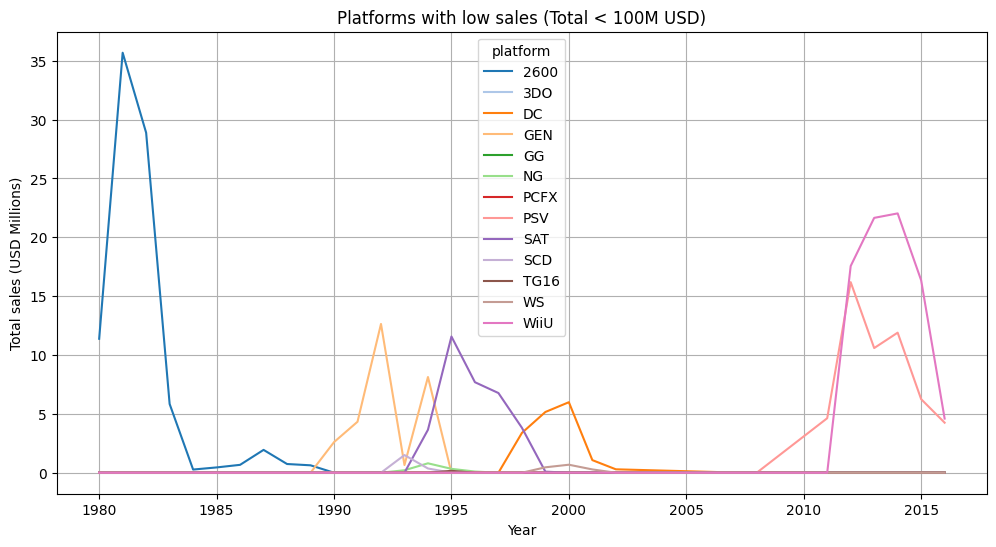

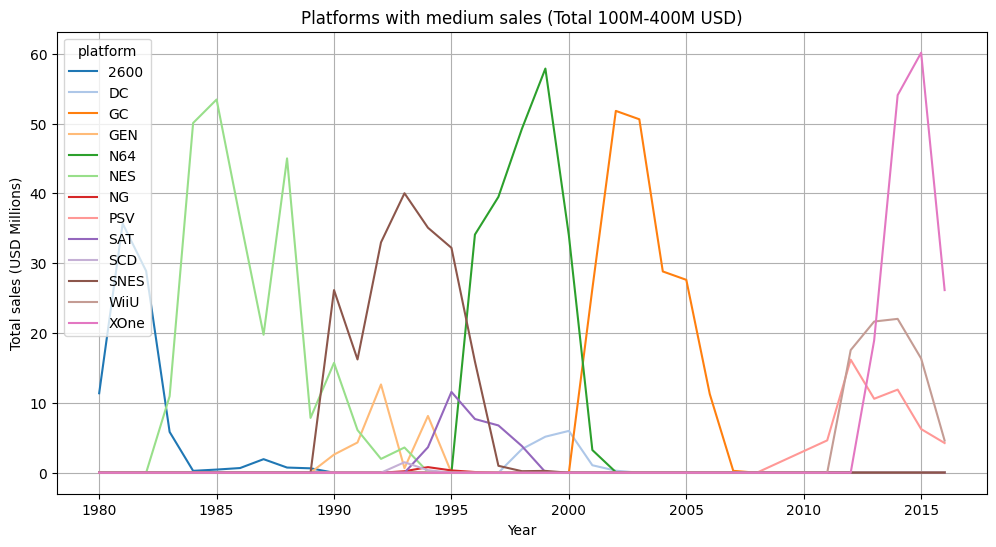

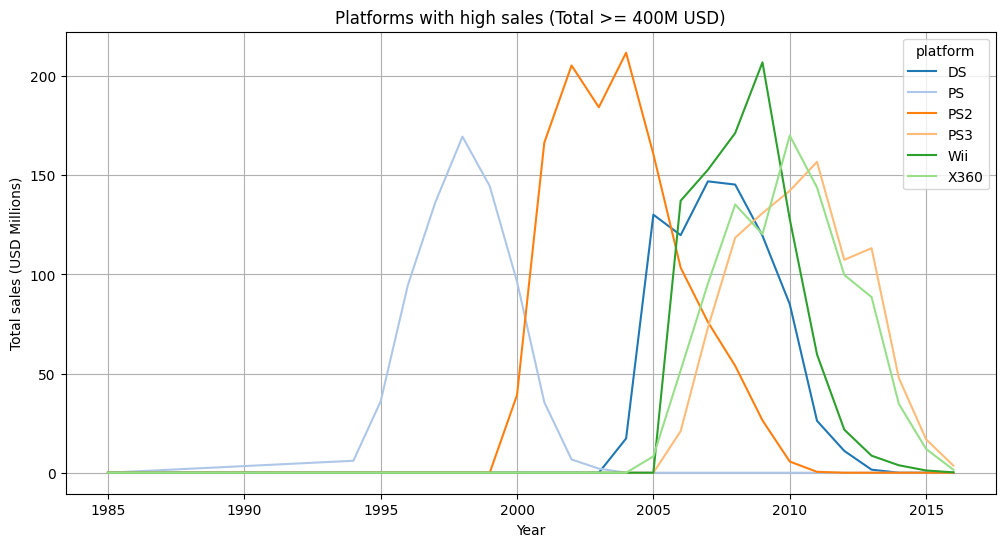

In [9]:
# Graph for each sales group

import matplotlib.pyplot as plt

# Graph for low sales platforms
low_sales_pivot.T.plot(
    figsize=(12,6),
    title='Platforms with low sales (Total < 100M USD)',
    xlabel='Year',
    ylabel='Total sales (USD Millions)',
    legend=True,  
    grid=True,
     color=plt.cm.tab20.colors,
)
plt.show()

# Graph for medium sales platforms
medium_sales_pivot.T.plot(
    figsize=(12,6),
    title='Platforms with medium sales (Total 100M-400M USD)',
    xlabel='Year',
    ylabel='Total sales (USD Millions)',
    legend=True,  # Mostrar leyenda
    grid=True,
    color=plt.cm.tab20.colors,
)
plt.show()

# Graph for high sales platforms
high_sales_pivot.T.plot(
    figsize=(12,6),
    title='Platforms with high sales (Total >= 400M USD)',
    xlabel='Year',
    ylabel='Total sales (USD Millions)',
    legend=True, 
    grid=True,
    color=plt.cm.tab20.colors,
)
plt.show()

Total sales data was grouped in 3 groups: platforms with total sales of less than 100M USD, platforms with total sales between 100M-400M USD and platforms with sales higher than 400M
As for the platforms with the highest total sales volume from 1985 to 2016, there are 6 platforms with total sales higher tan 400 million USD: DS, PS, PS2, PS3, Wii & X360.

The graph shows that most of these high sales platforms started having sales after year 2000. The PS platform had a sales peak between 1995 and 2000, and then it disappeared. When PS started having a decrease in sales, PS2 came out and had a peak between 2005 and 2005. We can see that when PS2 sales began to decrease around 2004, DS came out in 2003 and PS3 right after it in 2005. It is clear that a platform starts decreasing sales when a new platform was released. For example, DS's first decrease in sales was around 2005 when Wii started having sales.From 2000 onwards, it only took 1 year or less for a new platform to get launched. The lifespan for these high sales platforms is around 10 years. For example, since its launching in 1994 PS had sales until around 2002 and in 2005 it had no sales at all. PS2 had sales from 1999 to 2010 and 2011 it had no more sales.PS3 had sales from 2005 until a bit after 2015.

### Determine from what period you should take data. To do this, look at your answers to the previous questions. The data should allow you to build a model for 2017. Work only with the data that you consider relevant. Ignore data from previous years.

Based on the 3 previous graphs, it only makes sense to work with data from 1995 onwards because we can see a much clearer sales pattern: a platform gets launched, reaches its sales peak and then disappears. For this, daya will be filtered.

1995 2016

Pivot Table for platfomr sales from 1995 onwards:
release_year   1995   1996    1997    1998    1999   2000    2001    2002  \
platform                                                                    
3DO            0.08   0.00    0.00    0.00    0.00   0.00    0.00    0.00   
3DS            0.00   0.00    0.00    0.00    0.00   0.00    0.00    0.00   
DC             0.00   0.00    0.00    3.38    5.16   5.99    1.07    0.29   
DS             0.00   0.00    0.00    0.00    0.00   0.00    0.00    0.00   
GB             3.60  36.03    6.37   26.90   38.00  19.76    9.24    0.00   
GBA            0.00   0.00    0.00    0.00    0.00   0.07   61.53   74.16   
GC             0.00   0.00    0.00    0.00    0.00   0.00   26.34   51.81   
N64            0.00  34.10   39.50   49.24   57.87  33.97    3.25    0.08   
NG             0.33   0.10    0.00    0.00    0.00   0.00    0.00    0.00   
PC             4.22  10.58   11.27    3.26    4.74   4.66    5.47    8.57   
PCFX           

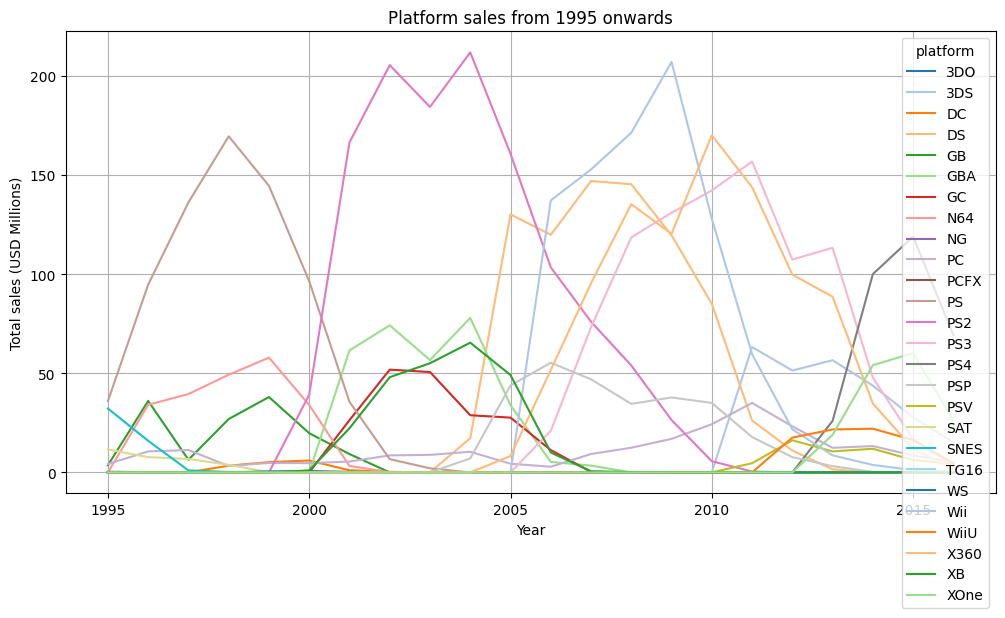

In [10]:
# Filter data frame to keep only data from 1995 onwards

games = games[games["release_year"] >= 1995]
print(games["release_year"].min(), games["release_year"].max())


# Create pivot table for data from 1995 onwards 

pivot_sales_1995_onwards = games.pivot_table(index="platform",
                                             columns="release_year",
                                             values="total_sales",
                                             aggfunc="sum")
pivot_sales_1995_onwards.fillna(0, inplace=True)

print("\nPivot Table for platfomr sales from 1995 onwards:")
print(pivot_sales_1995_onwards)


# Create graph

pivot_sales_1995_onwards.T.plot(
    figsize=(12,6),
    title = "Platform sales from 1995 onwards",
    xlabel="Year",
    ylabel="Total sales (USD Millions)", 
    grid=True,
    legend=True,
    color=plt.cm.tab20.colors)
plt.show()

### Which platforms are leaders in sales? Which ones grow and which ones shrink? Choose several potentially profitable platforms.

The same previous analysis will be performed for data from 1995 onwards.

In [11]:
# Perform the same analysis with the filtered data from 1995 onwards

platform_sales = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
print("\nTotal sales by platform")
print(platform_sales)

# Segregate platforms by sales volume

# < 100 Million USD
low_sales = platform_sales.tail(10).index  # Last 10 platforms 
low_sales_data = games[games["platform"].isin(low_sales)]  # Filter data for low sales platforms
low_sales_pivot = low_sales_data.pivot_table(index="platform",
                                             columns="release_year",
                                             values="total_sales",
                                             aggfunc="sum")
low_sales_pivot.fillna(0, inplace=True)
print("\nPivot Table for Low Sales Platforms (<100 Million USD) *Data from 1995 onwards:")
print(low_sales_pivot)

# 100-400 Million USD
medium_sales = platform_sales.iloc[6:16].index  # Platforms ranked 14th to 25th (100M-400M sales)
medium_sales_data = games[games["platform"].isin(medium_sales)]  # Filter data for medium sales platforms
medium_sales_pivot = medium_sales_data.pivot_table(index="platform",
                                                   columns="release_year",
                                                   values="total_sales",
                                                   aggfunc="sum")
medium_sales_pivot.fillna(0, inplace=True)
print("\nPivot Table for Medium Sales Platforms (100-400 Million USD):*Data from 1995 onwards")
print(medium_sales_pivot)

# >= 400 Million USD
high_sales = platform_sales.head(6).index  # First 6 platforms with high sales (>=400M USD)
high_sales_data = games[games["platform"].isin(high_sales)]  # Filter data for high sales platforms
high_sales_pivot = high_sales_data.pivot_table(index="platform",
                                               columns="release_year",
                                               values="total_sales",
                                               aggfunc="sum")
high_sales_pivot.fillna(0, inplace=True)
print("\nPivot Table for High Sales Platforms (>=400 Million USD) *Data from 1995 onwards:")
print(high_sales_pivot)


Total sales by platform
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       721.55
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       239.79
N64      218.01
GC       196.73
XOne     159.32
GB       139.90
WiiU      82.19
PSV       53.81
SNES      49.59
SAT       29.94
DC        15.95
WS         1.42
NG         0.43
TG16       0.16
3DO        0.08
PCFX       0.03
Name: total_sales, dtype: float64

Pivot Table for Low Sales Platforms (<100 Million USD) *Data from 1995 onwards:
release_year   1995   1996  1997  1998  1999  2000  2001  2002  2007  2008  \
platform                                                                     
3DO            0.08   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
DC             0.00   0.00  0.00  3.38  5.16  5.99  1.07  0.29  0.02  0.04   
NG             0.33   0.10  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
PCFX           0.00   0.03  0.00  0.00  0.00 

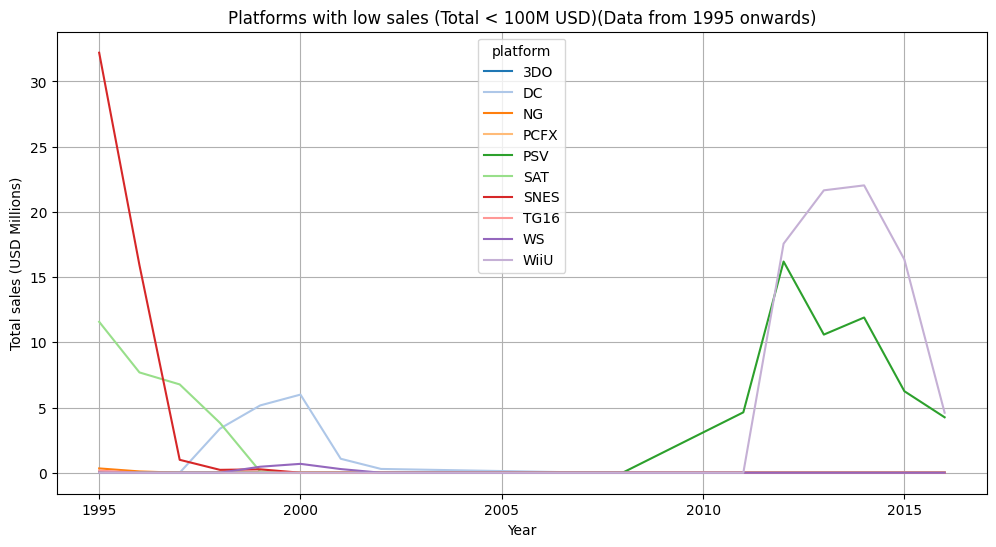

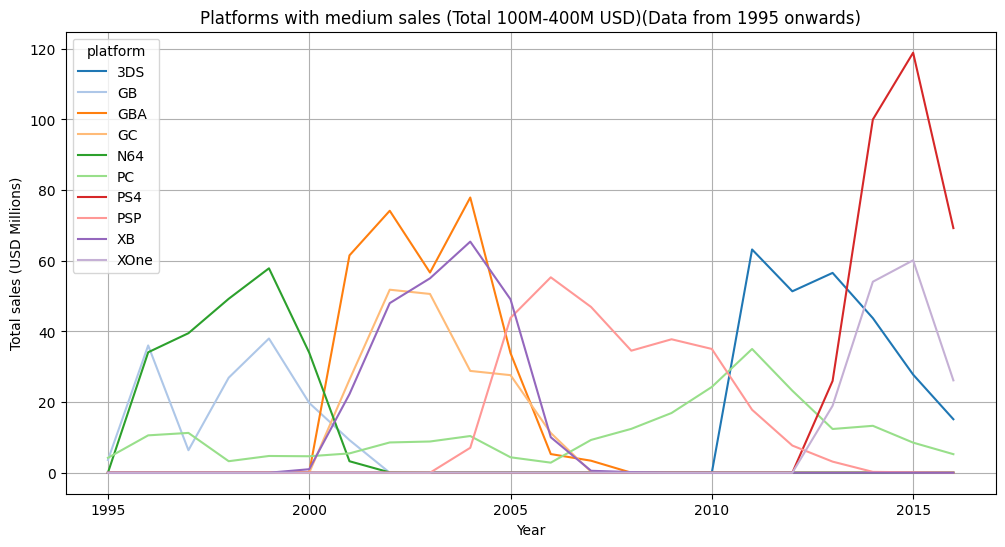

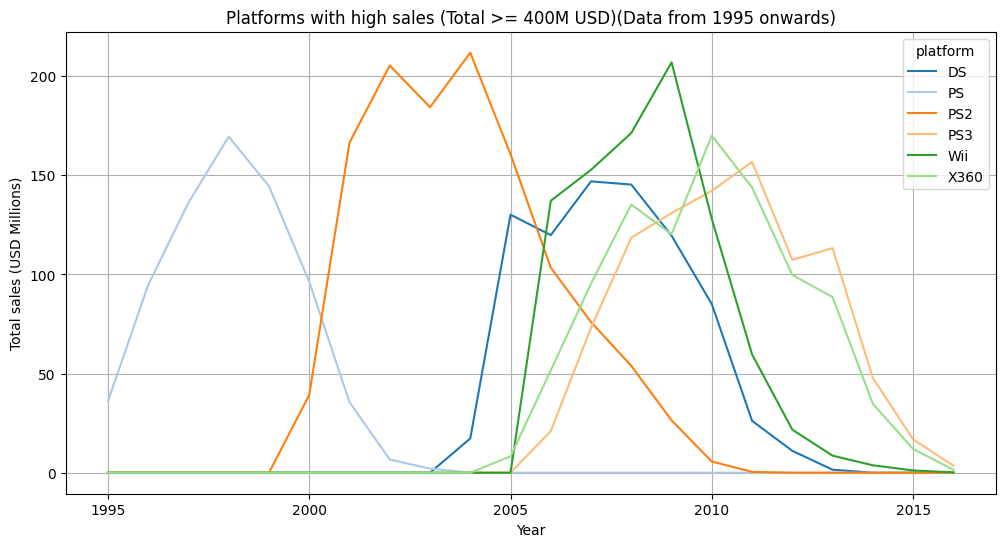

In [12]:
# Graph for each sales group

import matplotlib.pyplot as plt

# Graph for low sales platforms
low_sales_pivot.T.plot(
    figsize=(12,6),
    title='Platforms with low sales (Total < 100M USD)(Data from 1995 onwards)',
    xlabel='Year',
    ylabel='Total sales (USD Millions)',
    legend=True,  
    grid=True,
     color=plt.cm.tab20.colors,
)
plt.show()

# Graph for medium sales platforms
medium_sales_pivot.T.plot(
    figsize=(12,6),
    title='Platforms with medium sales (Total 100M-400M USD)(Data from 1995 onwards)',
    xlabel='Year',
    ylabel='Total sales (USD Millions)',
    legend=True,  # Mostrar leyenda
    grid=True,
    color=plt.cm.tab20.colors,
)
plt.show()

# Graph for high sales platforms
high_sales_pivot.T.plot(
    figsize=(12,6),
    title='Platforms with high sales (Total >= 400M USD)(Data from 1995 onwards)',
    xlabel='Year',
    ylabel='Total sales (USD Millions)',
    legend=True, 
    grid=True,
    color=plt.cm.tab20.colors,
)
plt.show()

Once again, platforms with the highest sales are DS, PS, PS2, Wii & X360. It is perfectly clear that when a platform launches the next one, the previous one starts to see a downfall on its sales. The best example for this is PS (PlayStation). The first PS was launched before 1995, around 1998 it reached its sales peak and immediately started having a downfall in sales because in 1999 PS2 was launched. PS2 then outselled PS, had a sales downfall around 2003 because that is when DS was launched. It did recover in sales but ultimately it had a final downfall in 2004 because X360 was released. Later in 2005 PS3 was launched and around 2012 it started having lower sales because in 2012 PS4 was launched, though PS4 never surpassed 120M USD in sales. As previously mentioned, the lifespan for these high sales platforms is around 10 years. As for mid-sales platforms, the life span is around 7 years and sales for these also start sinking when a new platform is launched. This is the case for GBA, which was launched in 2000 and started losing sales in 2003, the same year when DS and PSP were released. It finally disappeared in 2008.

### Create a boxplot for global sales of all games, broken down by platform. Are the differences in sales significant? What happens to average sales across platforms? Describe your findings.


Platform sales from 1995 onwards:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       721.55
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       239.79
N64      218.01
GC       196.73
XOne     159.32
GB       139.90
WiiU      82.19
PSV       53.81
SNES      49.59
SAT       29.94
DC        15.95
WS         1.42
NG         0.43
TG16       0.16
3DO        0.08
PCFX       0.03
Name: total_sales, dtype: float64

Mean and median sales: 313.6503846153829 207.3700000000003


<AxesSubplot:xlabel='total_sales'>

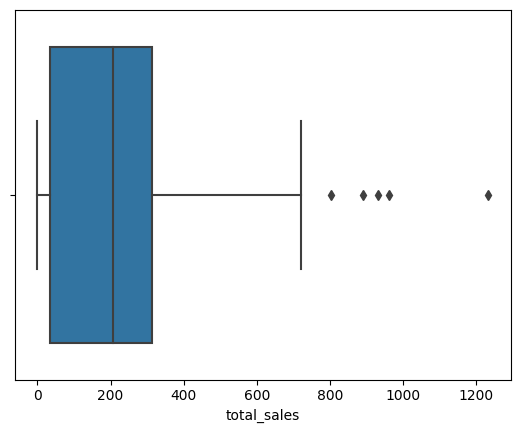

In [13]:
# import libraries to create box plot
import seaborn as sns

print("\nPlatform sales from 1995 onwards:")

# we use the data grouped by platform
print(platform_sales)
print("\nMean and median sales:", platform_sales.mean(), platform_sales.median())
sns.boxplot(platform_sales)

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

The box plot shows that 50% of the platforms have lower to medium sales, meaning 0 to 400 million dollars. Platforms with sales higher than 700M USD are considered outliers and represent the remaining 25% of the data. When  estimating and comparing the mean vs median, since the mean (313.65) is greater than the median (207.37) we can state that the data is skewed to the right. This means that there are a few outliers that inflate the mean. This findings suggest that only a few platforms (outliers) dominate the market such as PS2, X360, PS3, Wii & DS, but most platforms do not sell as much, resulting in market concentration. Therefore, there is a significant difference in sales between the top platforms (outliers) and the rest of the platforms.

### Look at how user and critic scores affect sales of a a popular platform (of your choice). Create a scatter plot and estimate the correlation between sales and scores. Draw conclusions. 

In [14]:
from matplotlib import pyplot as plt
games["user_score"] = pd.to_numeric(games["user_score"], errors="coerce")
games["critic_score"] = pd.to_numeric(games["critic_score"], errors="coerce")


# Filter data for platform X360 (high sales platform)

x360_games = games[games["platform"] == "X360"]

# Calculate correlations for the X360 platform
corr_sales_userscore_x360 = x360_games["total_sales"].corr(x360_games["user_score"])
corr_sales_criticscore_x360 = x360_games["total_sales"].corr(x360_games["critic_score"])

print("\nCorrelation between sales and user scores (X360):", corr_sales_userscore_x360)
print("\nCorrelation between sales and critic scores (X360):", corr_sales_criticscore_x360)


corr_sales_userscore = games["total_sales"].corr(games["user_score"])
corr_sales_criticscore = games["total_sales"].corr(games["critic_score"])
print("\nCorrelation between sales and user scores:", corr_sales_userscore)
print("\nCorrelation between sales and critic scores:", corr_sales_criticscore)


Correlation between sales and user scores (X360): 0.05902838121993745

Correlation between sales and critic scores (X360): 0.3606494835478316

Correlation between sales and user scores: 0.049467853412242704

Correlation between sales and critic scores: 0.2022173791500227


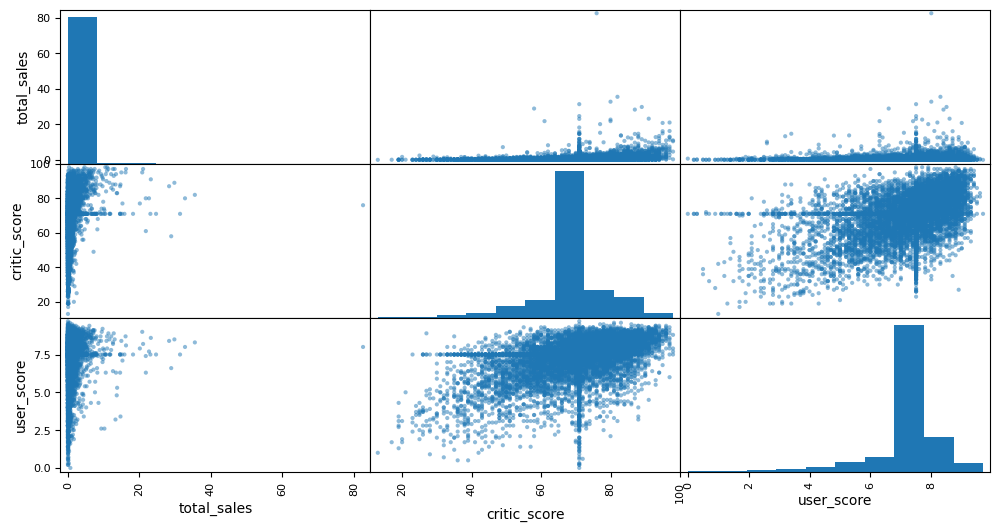

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# we filter the columns we need (total_sales, critic_score, and user_score) 
scatter_data = games[["total_sales", "critic_score", "user_score"]]

# Convert to numeric and drop NaN values
scatter_data = scatter_data.apply(pd.to_numeric, errors="coerce")
# Plot the scatter matrix
pd.plotting.scatter_matrix(scatter_data, figsize=(12, 6))
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

The correlation coefficients show small association degree betweeen sales and both user and critic score. Correlation between sales and user scores is 0.0775, while sales and critic score is slightly higher (0.2159). This suggests that sales level might depend on around 20% on critic scores, but it is not the definitive predictor. Also, the scatter plot shows no clear trend between total sales and user score. Between total sales and critic score we can identify a slight positive correlation but the trend is still weak. These findings suggest that sales levels depend on something else rather than the scores from users and critics.

### Considering your previous insights, compare sales for the same games across other platforms. 

In [16]:
# Group data by game name and platform, then sum the sales
game_sales_by_platform = games.groupby(["name", "platform"])["total_sales"].sum().reset_index() # use reset_index so name and platform are handable columns and not indexes
# Create pivot table
pivot_game_sales_by_platform = game_sales_by_platform.pivot_table(index="name",
                                                      columns="platform",
                                                      values="total_sales",
                                                      aggfunc="sum")
# replace NaN with 0
pivot_game_sales_by_platform.fillna(0, inplace=True)

# Sum total sales by game across all platforms

pivot_game_sales_by_platform["total_sales"] = pivot_game_sales_by_platform.sum(axis=1) #axis=1 so sales are summed across platforms (horizontaly)
print(pivot_game_sales_by_platform)


platform                      3DO   3DS   DC    DS   GB  GBA   GC  N64   NG  \
name                                                                          
 Beyblade Burst               0.0  0.03  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
 Fire Emblem Fates            0.0  1.67  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
 Frozen: Olaf's Quest         0.0  0.59  0.0  0.51  0.0  0.0  0.0  0.0  0.0   
 Haikyu!! Cross Team Match!   0.0  0.04  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
 Tales of Xillia 2            0.0  0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
...                           ...   ...  ...   ...  ...  ...  ...  ...  ...   
thinkSMART FAMILY!            0.0  0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
thinkSMART: Chess for Kids    0.0  0.00  0.0  0.01  0.0  0.0  0.0  0.0  0.0   
uDraw Studio                  0.0  0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
uDraw Studio: Instant Artist  0.0  0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
¡Shin Chan Flipa en colores!  0.0  0.00  0.0  0.14  

In [17]:
# Sort data by games with highest to lowest total sales
pivot_game_sales_by_platform_sorted = pivot_game_sales_by_platform.sort_values(by="total_sales", ascending=False)

#Show only the total_sales column
filtered = pivot_game_sales_by_platform_sorted[ "total_sales"]
print("\nTop 100 games in sales:", filtered.head(100))


Top 100 games in sales: name
Wii Sports                       82.54
Grand Theft Auto V               56.58
Mario Kart Wii                   35.52
Wii Sports Resort                32.77
Pokemon Red/Pokemon Blue         31.38
                                 ...  
LEGO Marvel Super Heroes          9.41
Madden NFL 07                     9.22
Watch Dogs                        9.18
Animal Crossing: New Leaf         9.17
Assassin's Creed: Revelations     9.15
Name: total_sales, Length: 100, dtype: float64


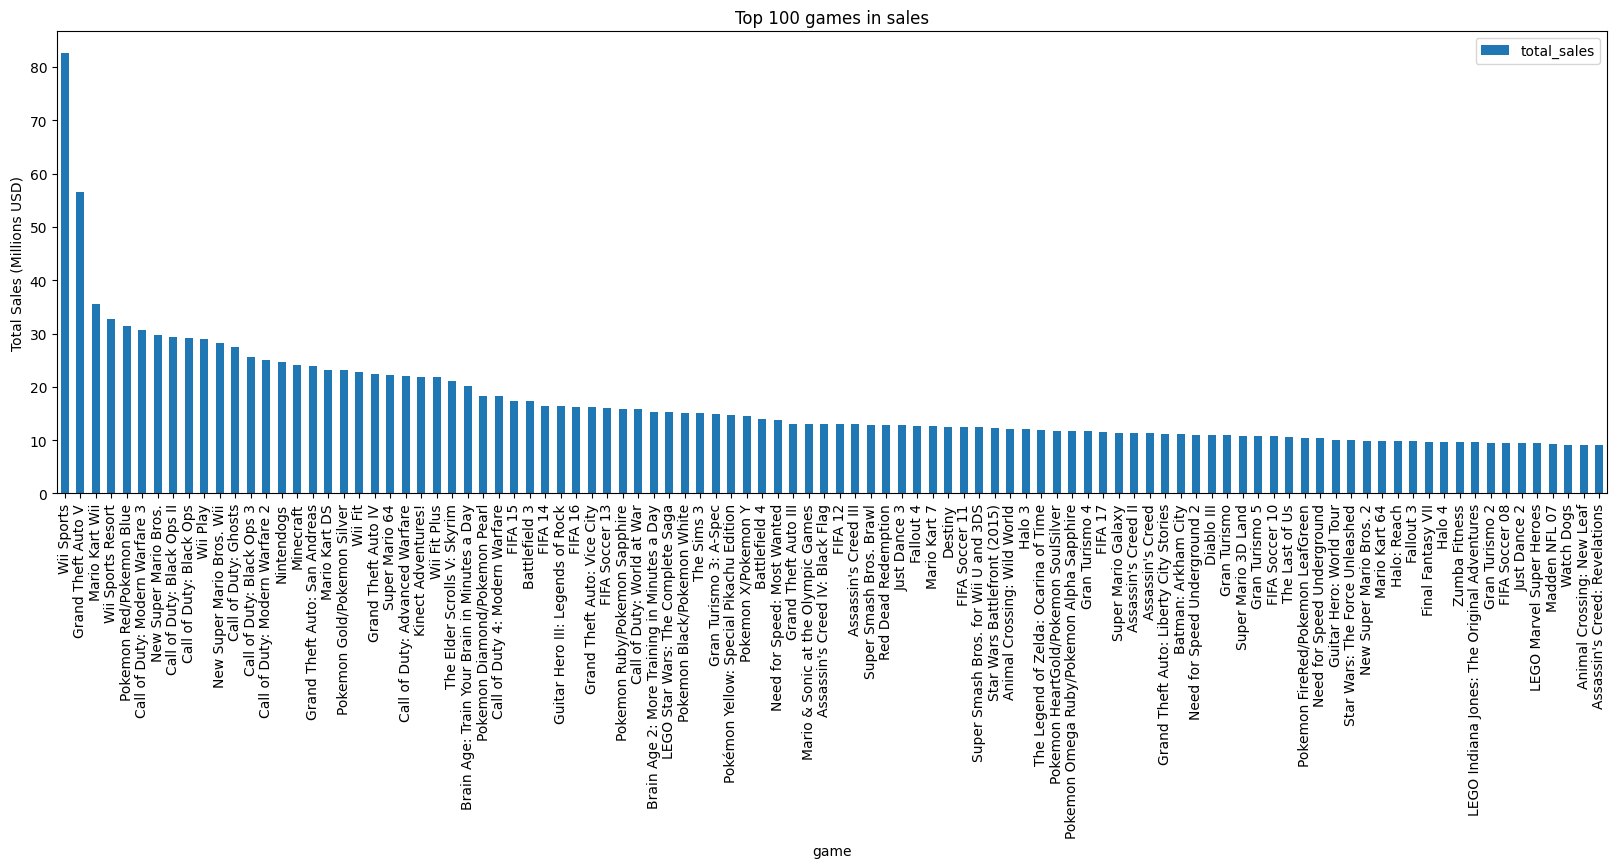

In [18]:
# For the top 100 games in sales, platforms will be analyzed

#Select top 100 games in sales
top100_games = pivot_game_sales_by_platform_sorted.head(100)
#print(top20_games)
import matplotlib.pyplot as plt

top100_games.plot(y = "total_sales",
                 kind = "bar", 
                 xlabel = "game",
                 ylabel = "Total Sales (Millions USD)", 
                 title = "Top 100 games in sales",
                 figsize= (20,6))
plt.show()

In [19]:
# Select the top 100 games based on total sales
top100_games = pivot_game_sales_by_platform_sorted.head(100).index # since game names are now the index, .index takes the row labels (game names)

# Filter the original game_sales_by_platform DataFrame for the top 100 games
top100_games = game_sales_by_platform[game_sales_by_platform["name"].isin(top100_games)]

# Create a pivot table for the top 100 games
pivot_top100_games = top100_games.pivot_table(index="name", 
                                                      columns="platform", 
                                                      values="total_sales", 
                                                      aggfunc="sum")
print(pivot_top100_games)

# sum the sales for the top 100 games
top100_platform_sales = pivot_top100_games.sum(axis=0) # axis=0 so sales are summed down the columns

platforms = len(top100_platform_sales)

# Sort 
top100_platform_sales = top100_platform_sales.sort_values(ascending=False)

message = f"Top 100 games (in sales) are sold across {platforms} platforms"
print(message)
print(top100_platform_sales)


platform                      3DS     DS  GB  GBA  GC  N64    PC  PS  PS2  \
name                                                                        
Animal Crossing: New Leaf    9.17    NaN NaN  NaN NaN  NaN   NaN NaN  NaN   
Animal Crossing: Wild World   NaN  12.14 NaN  NaN NaN  NaN   NaN NaN  NaN   
Assassin's Creed              NaN    NaN NaN  NaN NaN  NaN  0.91 NaN  NaN   
Assassin's Creed II           NaN    NaN NaN  NaN NaN  NaN  0.55 NaN  NaN   
Assassin's Creed III          NaN    NaN NaN  NaN NaN  NaN  0.93 NaN  NaN   
...                           ...    ...  ..  ...  ..  ...   ...  ..  ...   
Wii Fit Plus                  NaN    NaN NaN  NaN NaN  NaN   NaN NaN  NaN   
Wii Play                      NaN    NaN NaN  NaN NaN  NaN   NaN NaN  NaN   
Wii Sports                    NaN    NaN NaN  NaN NaN  NaN   NaN NaN  NaN   
Wii Sports Resort             NaN    NaN NaN  NaN NaN  NaN   NaN NaN  NaN   
Zumba Fitness                 NaN    NaN NaN  NaN NaN  NaN   NaN NaN  NaN   

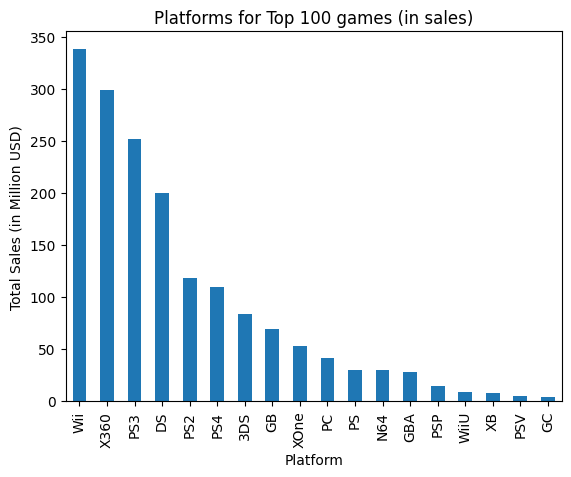

In [20]:
from matplotlib import pyplot as plt

top100_platform_sales.plot(title = "Platforms for Top 100 games (in sales)",
                           xlabel = "Platform",
                           ylabel = "Total Sales (in Million USD)",
                           kind = "bar")
plt.show()

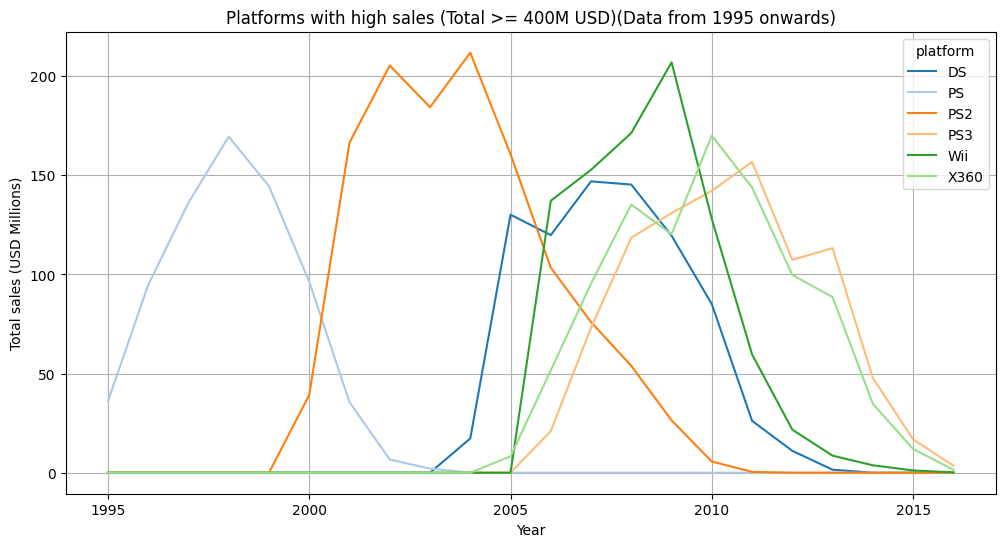

In [21]:
# Lets show again previous graph for platforms with sales of at least 400 M USD
high_sales_pivot.T.plot(
    figsize=(12,6),
    title='Platforms with high sales (Total >= 400M USD)(Data from 1995 onwards)',
    xlabel='Year',
    ylabel='Total sales (USD Millions)',
    legend=True, 
    grid=True,
    color=plt.cm.tab20.colors,
)
plt.show()

To compare sales for games across different platforms, we grouped the data by game name and platform, then summed the sales for every game across all platforms. Once sorted, we took the top 100 games in sales and plotted a bar graph. It can be seen that the top 100 games are sold across only 18 platforms. It is important to highlight that once we filitered data after 1995, there were 26 platforms. These results are consistent with our previous analysis across time. Platforms such as Wii, X360, PS3, DS, PS2 & PS4 have games that sales of at least 100 Million USD. This suggests that these platforms are well liked by customers and therefore are loyal to the platforms. 

### Take a look at the general distribution of games by genre. What can you say about most profitable genres? Can you generalize about genres with high and low sales?

In [22]:
# group sales data by genre

genre_sales = games.groupby("genre")["total_sales"].sum()

# sort by sales volume
genre_sales = genre_sales.sort_values(ascending=False)
print(f"There are {len(genre_sales)} genres:", genre_sales)
print(genre_sales.mean(), genre_sales.median())


There are 12 genres: genre
Action          1645.07
Sports          1258.33
Shooter          967.94
Role-Playing     888.47
Misc             773.67
Racing           692.41
Platform         611.83
Fighting         402.57
Simulation       379.12
Adventure        210.25
Strategy         166.88
Puzzle           158.37
Name: total_sales, dtype: float64
679.5758333333274 652.1199999999956


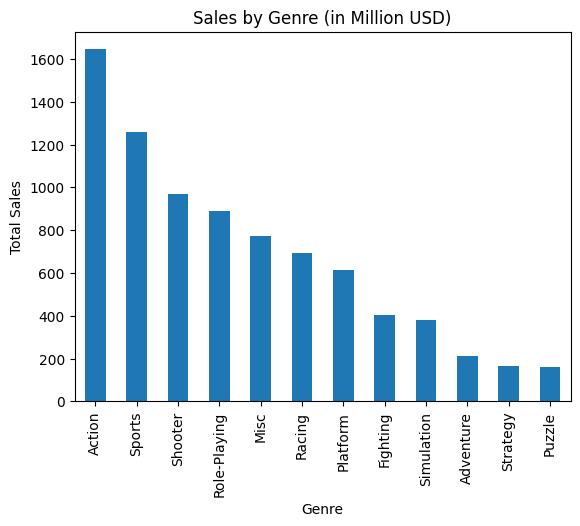

In [23]:
genre_sales.plot(kind="bar", 
                 xlabel="Genre", 
                 ylabel="Total Sales", 
                 title="Sales by Genre (in Million USD)")
plt.show()

Genres like Action, Sports and Shooter rank highest in total sales. Mid-sales genres are Role-Playing, Misc, Racing or Fighting do not sell as much but do sell more than Adventure, Strategy and Puzzle games. A general insight would be that high sales genres include fast-pace gaming (action, sports, shooter) and usually also include the multi-player experience. Low sales genres are those for solo-playing and relate to more specific interests like brain-training games in Puzzle or strategy games.

## User profile by region

### For each region (NA, UE, JP) determine: 1. The 5 main platforms. Describe differences in market shares among regions. 2. The 5 main genres. Describe differences. 3. If ESRB ratings impact sales on individual regions. 


In [24]:
# Create a function that uses the "games" dataset and the column sales for each region as parameters, determines the top 5 platforms, top 5 genres as well as sales by ESRB rating 
import pandas as pd

def region_analysis(data, region_column):
    # Filter data by region, group by platform and sum total sales in that region, sort by highest to lowest sales
    region_sales = data.groupby("platform")[region_column].sum().sort_values(ascending=False)
    # Select top 5 platforms in sales 
    top5_platforms = region_sales.head(5) 
    filtered_data = data[data["platform"].isin(top5_platforms.index)]
    # Estimate market share for top 5 platforms 
    total_region_sales = region_sales.sum()
    platform_market_share = (top5_platforms / total_region_sales) * 100
    
    # Top 5 genres, group by genre and sum total sales for the region, sort by highest to lowest sales
    genres_sales = filtered_data.groupby("genre")[region_column].sum().sort_values(ascending=False)
    top5_genres = genres_sales.head(5)

    # Group by rating, sum total sales for that region, sort by highest to lowest sales
    esrb_sales = filtered_data.groupby("rating")[region_column].sum().sort_values(ascending=False)

    # Return dictionary with top 5 platforms, top 5 genres and sales by ESRB rating for each region
    return {
        "top5_platforms": top5_platforms,# "key"shows top 5 platform names, : value stores the output of region_sales.head(5) (the sales in USD)
        "platform_market_share": platform_market_share,
        "top5_genres": top5_genres,
        "esrb_sales": esrb_sales
    }

# Apply the function for each region
    # NA region
na_analysis = region_analysis(games, "na_sales")
    # EU region
eu_analysis = region_analysis(games, "eu_sales")
    # JP region
jp_analysis = region_analysis(games, "jp_sales")

# Print results

print("NA Analysis:")
print("Top 5 Platforms:\n", na_analysis["top5_platforms"])
print("Platform Market Share:\n", na_analysis["platform_market_share"])
print("Top 5 Genres:\n", na_analysis["top5_genres"])
print("ESRB Sales:\n", na_analysis["esrb_sales"])

print("Japan Analysis:")
print("Top 5 Platforms:\n", jp_analysis["top5_platforms"])
print("Platform Market Share:\n", jp_analysis["platform_market_share"])
print("Top 5 Genres:\n", jp_analysis["top5_genres"])
print("ESRB Sales:\n", jp_analysis["esrb_sales"])


print("Europe Analysis:")
print("Top 5 Platforms:\n", eu_analysis["top5_platforms"])
print("Platform Market Share:\n", eu_analysis["platform_market_share"])
print("Top 5 Genres:\n", eu_analysis["top5_genres"])
print("ESRB Sales:\n", eu_analysis["esrb_sales"])



NA Analysis:
Top 5 Platforms:
 platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
Platform Market Share:
 platform
X360    14.929443
PS2     14.357566
Wii     12.201124
PS3      9.776788
DS       9.530695
Name: na_sales, dtype: float64
Top 5 Genres:
 genre
Action     515.42
Sports     441.22
Shooter    336.31
Misc       293.08
Racing     182.71
Name: na_sales, dtype: float64
ESRB Sales:
 rating
E       885.04
M       542.56
T       485.38
E10+    265.24
EC        1.35
Name: na_sales, dtype: float64
Japan Analysis:
Top 5 Platforms:
 platform
DS     175.00
PS2    137.54
PS     137.11
3DS    100.62
PS3     79.41
Name: jp_sales, dtype: float64
Platform Market Share:
 platform
DS     16.351167
PS2    12.851083
PS     12.810906
3DS     9.401454
PS3     7.419692
Name: jp_sales, dtype: float64
Top 5 Genres:
 genre
Role-Playing    186.67
Action          101.53
Misc             60.52
Sports           58.36
Simulation       46.17
Nam

North America Analysis


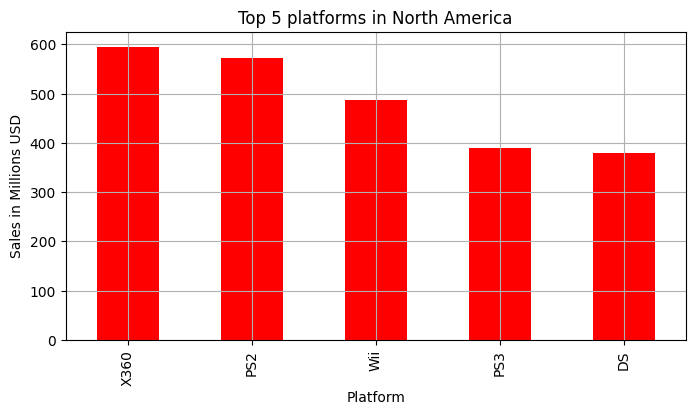

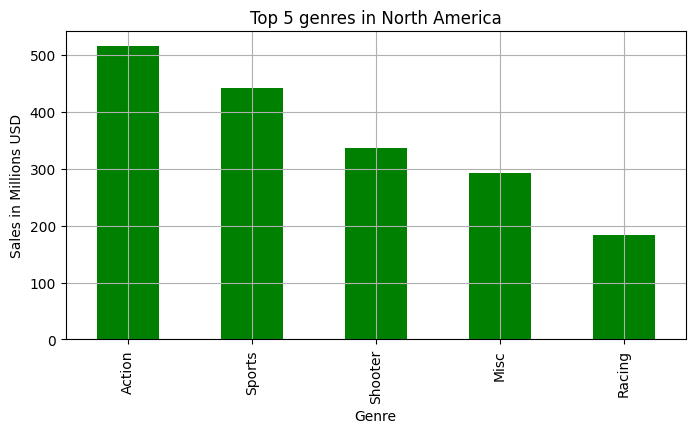

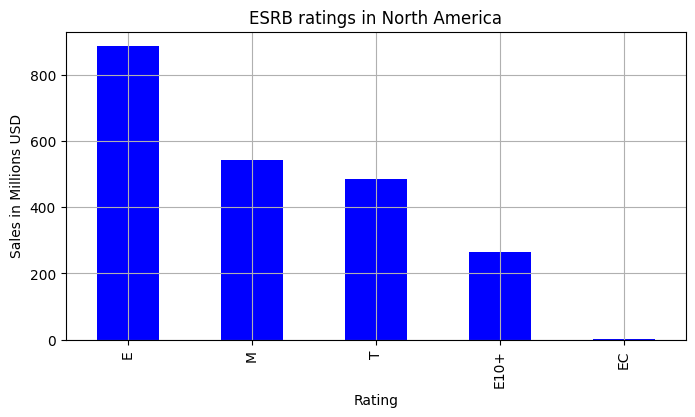

None

JP Analysis


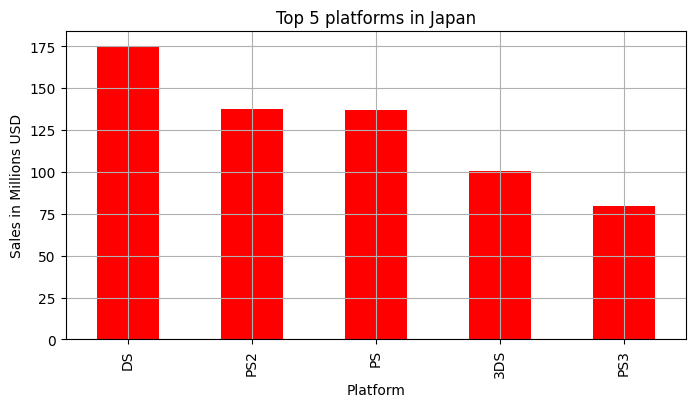

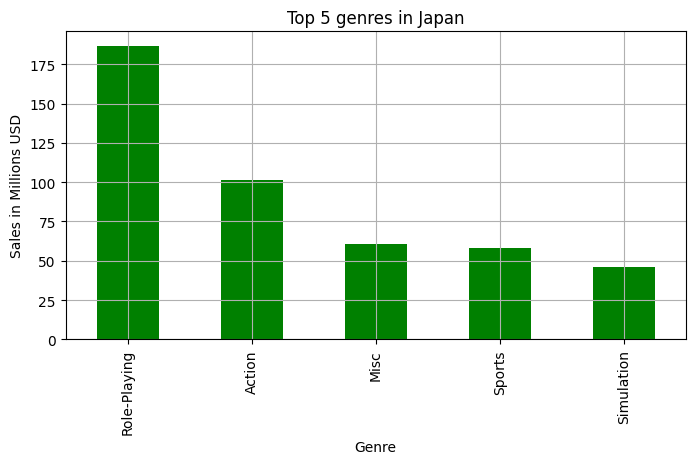

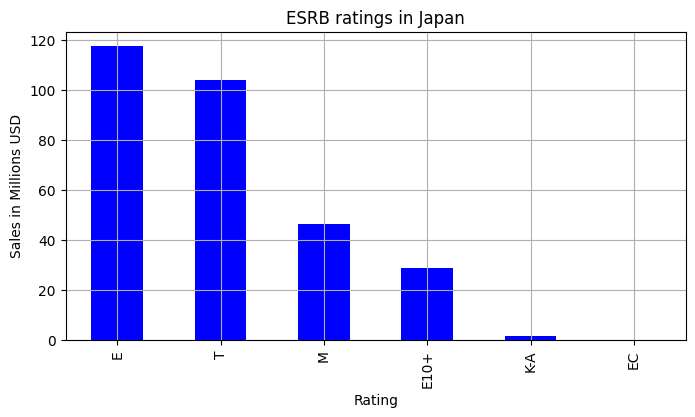

None

Europe Analysis


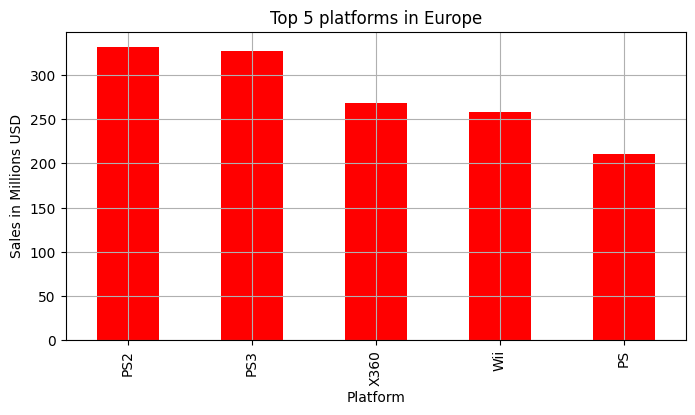

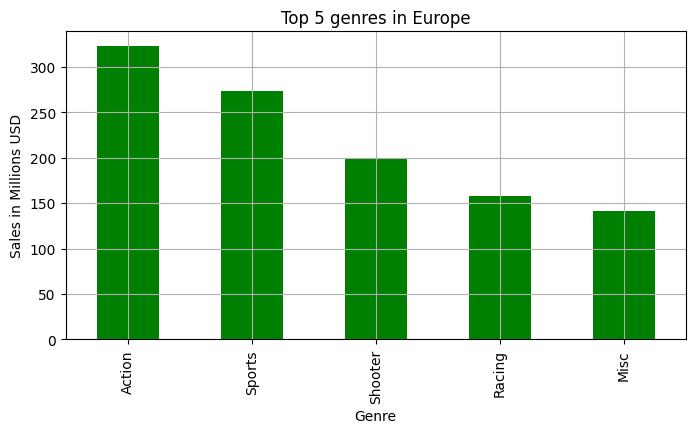

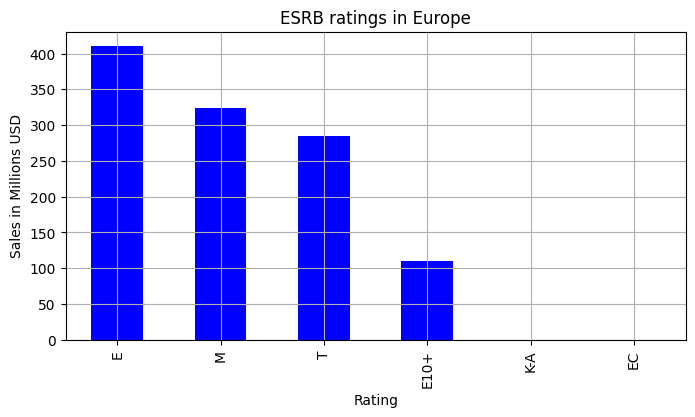

None


In [25]:
# Create a function to graph bar plots

from matplotlib import pyplot as plt

def plot_results(region_name, analysis_results): # Name of the region and result analysis for each region in na_analysis, jp, analysis, eu_analysis
   # Top 5 platforms
    analysis_results["top5_platforms"].plot(kind='bar',
                                            title=f"Top 5 platforms in {region_name}",
                                            xlabel="Platform",
                                            ylabel="Sales in Millions USD",
                                            figsize=(8,4),
                                            color="red",
                                            grid=True)
    plt.show()

    # Top 5 genres
    
    analysis_results["top5_genres"].plot(kind='bar', 
                                         title=f"Top 5 genres in {region_name}",
                                         xlabel="Genre",
                                         ylabel="Sales in Millions USD",
                                         figsize=(8,4),
                                         color='green',
                                         grid=True)
    plt.show()

    # ESRB sales
    
    plt.figure(figsize=(10, 6))
    analysis_results["esrb_sales"].plot(kind='bar',
                                        title=f"ESRB ratings in {region_name}",
                                        xlabel="Rating",
                                        ylabel="Sales in Millions USD",
                                        figsize=(8,4),
                                        color="blue",
                                        grid=True)
    plt.show()

# Plot results for each region
print("North America Analysis")
print(plot_results("North America", na_analysis))
print("\nJP Analysis")
print(plot_results("Japan", jp_analysis))
print("\nEurope Analysis")
print(plot_results("Europe", eu_analysis))


In [26]:
# Estimate market shares 

# Market share per region

na_total_sales = games["na_sales"].sum()
jp_total_sales = games["jp_sales"].sum()
eu_total_sales = games["eu_sales"].sum()
other_total_sales = games["other_sales"].sum()

# Estimate global sales

global_sales = games["total_sales"].sum()

# market shares in %

na_market_share = (na_total_sales / global_sales) * 100
jp_market_share = (jp_total_sales / global_sales) * 100
eu_market_share = (eu_total_sales / global_sales) * 100
other_market_share = (other_total_sales / global_sales) * 100

market_share = {"North America" : na_market_share,
                "Japan" : jp_market_share,
                "Europe" : eu_market_share,
                "Other regions": other_market_share}

for region, share in market_share.items():
    print(region, share.round(2))



North America 48.93
Japan 13.12
Europe 28.52
Other regions 9.43


In North America, the main platforms in terms of sales are X360, PS2, Wii, PS3 and DS. The first 2 with sales of almost 600 Million USD, almost 500 Million USD and the last 2 almost 400 Million USD. The top 5 genres are action, sports, shooter, Miscellaneous and racing with sales over 500 Millions, 400 Millions, 300 Millions, almost 300 Millions, and almost 200 millions respectively. As for the ESRB ratings, E (everyone) had sales over 800 Millions, M (mature +17) sales over 500 Millions, T (teenagers) sales over 400 M, E10 (everyone 10+) and RP (rating pending) had sales slightly over 200 Millions. 

In Japan, the top 5 platforms in sales are DS, PS2, PS, 3DS and PS3. (175M, 137M, 137M, 100M and 80 M respectively). The top 5 genres are role-playing, action, miscellaneous, sports and simulation with sales of 185M, 100M, 60M, 60M and 45 M respectively. As for ESRB ratings and sales, the rating category with highest sales (330M) in the region is RP (rating pending), other categories E (everyone), T (teenagers), M (Mature +17), E10+ (everyone +10), K-A didn't reach sales over 125 M. 


As for Europe, the main platforms are PS2, PS3, X360, Wii and PS (320M, 320M, 260M, 255M, and 210 M USD respectively) Top 5 genres are action(325 M), sports (270M), shooter (200M), racing (155 M), and miscellaneous (145). ESRB ratings with highest sales are E (everyone) with sales over 400 M USD, M (mature +17) with sales of 325 M, T (teenagers) and RP (rating pending).

* Top 5 Platforms & Market Share Variations:
North America (NA): X360 leads with 14.93%, followed by PS2, Wii, PS3, and DS.
Japan (JP): DS leads with 16.35%, followed by PS2, PS, 3DS, and PS3.
Europe (EU): PS2 leads with 14.3%, followed by PS3, X360, Wii, and PS.
PS2 is strong in NA, Europe, and Japan, but X360 and Wii are more dominant in NA. DS is uniquely dominant in Japan.

* Top 5 Genres & Differences:
NA: Action, Sports, Shooter, Misc, Racing.
JP: Role-Playing, Action, Misc, Sports, Simulation.
EU: Action, Sports, Shooter, Racing, Misc.
Role-Playing is popular in Japan, while Action and Sports dominate in NA and Europe. Misc is more prominent in NA and EU than in Japan.
* ESRB Ratings & Sales Impact:
NA: E (Everyone) and M (Mature) games dominate.
JP: Rating Pending is most popular.
EU: E and M games are most popular, similar to NA.

CONCLUSION:
Market share for platforms varies significantly across regions, with DS leading in Japan and X360 dominating in NA.In Europe, PS2 leads the market. Preferences differ, with Role Playing games being much more popular in Japan, while Action and Sports dominate in NA and Europe. ESRB ratings do not influence sales in all regions. An example for this is that while E games in NA generate over 800 M USD in sales, E games in Europe generate only 400 M USD. This makes sense if we consider that Europe has a smaller market share. Meanwhile, Japan shows a stronger preference for Rating Peniding games with sales of 170 M USD.

## Hypothesis testing

### Test following hypothesis: Average user score ratings for Xbox One and PC are the same. Set alpha value yourself. 

H0: μXboxOne ≠ μPC
H1: μXboxOne = μPC

In [27]:
from scipy import stats as st
import numpy as np

# filter user scores for XOne and PC AND convert scores to float
xbox_ratings = games[games["platform"]== "XOne"]["user_score"].astype(float)
pc_ratings = games[games["platform"]=="PC"]["user_score"].astype(float)

alpha = 0.05

# Levene test to verify variance equalness
levene_results_platforms = st.levene(xbox_ratings, pc_ratings)
print("Levene P value (XOne vs PC):", levene_results_platforms.pvalue)

if levene_results_platforms.pvalue < alpha:
    print("Reject H0: Variances are not equal.")
else:
    print("Do not reject H0: Variances are equal.")


results = st.ttest_ind(xbox_ratings, pc_ratings) # Now we know variances are equal, equal_var default value does not change
print("P value:", results.pvalue)

if results.pvalue < alpha:
    print("Reject H0")
else:
    print("H0 can not be rejected")
    
print(xbox_ratings.mean().round(2), pc_ratings.mean().round(2))
    

Levene P value (XOne vs PC): 0.9932273779302241
Do not reject H0: Variances are equal.
P value: 8.359067791961059e-05
Reject H0
6.78 7.16


In this case, the null hypothesis H0 is the denial of the statement we want to test: The average user score ratings for XOne and PC are NOT the same. Therefore, the alternative hypothesis H1 is that "The average user score ratings for XOne and PC are the same. Since the p-value is smaller than 0.05, we can reject the Null hypothesis. This means there is not enough statistical evidence to reject the statement that average user scores for XOne and PC are the same. In fact, if we print the mean values for XOne and PC user scores, we can see that these are not very different from each other.

### Average user score ratings for Action and Sports are different.

H0: μAction = μSports
H1: μAction ≠  μSports

In [28]:
# filter scores for Action and Sports and convert to float

action_ratings = games[games["genre"]== "Action"]["user_score"].astype(float)
sports_ratings = games[games["genre"]=="Sports"]["user_score"].astype(float)

alpha = 0.05

# Levene test to verify variance equalness
levene_results_genres = st.levene(action_ratings, sports_ratings)
print("Levene P value (Action vs Sports):", levene_results_genres.pvalue)

if levene_results_genres.pvalue < alpha:
    print("Reject H0: Variances are not equal.")
else:
    print("Do not reject H0: Variances are equal.")



ttest_results = st.ttest_ind(action_ratings, sports_ratings) # now we know variances are equal, equal_var default value does not change
print("P value:", ttest_results.pvalue)

if ttest_results.pvalue < alpha:
    print("Reject H0")
else:
    print("H0 can not be rejected")
    
print(action_ratings.mean().round(2), sports_ratings.mean().round(2))

Levene P value (Action vs Sports): 0.8431524191870503
Do not reject H0: Variances are equal.
P value: 0.5433473477074233
H0 can not be rejected
7.25 7.24


In this case, the null hypothesis H0 is the denial of the statement we want to test: The average user score ratings for Action and Sports are NOT different (the same.) Therefore, the alternative hypothesis H1 is that "The average user score ratings for Action and Sports are different (not the same). Since the p-value is greater than 0.05, we can not reject the Null hypothesis. This means there is enough statistical evidence to reject the statement that average user scores for Action and Sports are different. In fact, if we print the average user scores for both genres, we can see that these are almost the same. Therefore makes sense to not reject H0 (Action and Sports average user score are the same)

 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_ratings, pc_ratings)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo con la prueba de levene para mostrar el supueto de varianzas iguales. 
</div>

### How did you formulate the null and alternative hypothesis? What criteria did you use to test the hypotheses and why?

The null hypothesis should always be the denial of the statement we want to test. Therefore, we indirectly test the alternative hypothesis.For the first hypothesis, the statement to test is "Average user score ratings for Xbox One and PC are the same". The denial of this, in other words the null hypothesis, would be "Average user score ratings for Xbox One and PC are NOT the same". For the second hypothesis, we want to test that "Average user score ratings for Action and Sports are different". The denial of this, in other words the null hypothesis would be that "Average user score ratings for Action and Sports are  NOT different." In both cases, we want to compare the average of two independent samples taken of a population. Therefore, we use the st.ttest_ind(group1, group2) function. We asume that distributions for both samples are similar, therefore defalult parameter equal_var = True does not change.

## Overal conclusion

The videogame industry has evolved through years. Data starting in 1980 shows how from 1985 onwards, number of videogames launched has increased significantly. The life span of a platform varies among sales volume. For example, platforms with sales over 400 million USD usually last for 10 years in the market and then a new platform is launched. High sales platforms include PS2, X360, PS3, Wii, DS and PS.  Usually, when a platform launches the next one, the previous one starts to see a downfall on its sales. The best example for this is PS (PlayStation). The first PS was launched before 1995, around 1998 reached its sales peak and immediately started having a downfall in sales when PS2 was launched in 1999 PS2. PS2 then outselled PS, had a sales downfall around 2003 because that is when DS was launched. It did recover in sales but ultimately it had a final downfall in 2004 because X360 was released. Later in 2005 PS3 was launched and around 2012 it started having lower sales because in 2012 PS4 was launched. In general, 50% of the platforms have lower to medium sales, meaning 0 to 400 million dollars. Platforms with sales higher than 700M USD are considered outliers and represent the remaining 25% of the data.
As for critic and user scores, these barely have an impact on a platform sales. The correlation between sales and user scores for X360, a high sales platform, is only 0.08. The correlation between sales and critic scores is slightly higher: 0.37. Nevertheless, the average correlation between sales and critic scores for all games is 0.21. This suggests that sales levels depend on something else rather than the scores from users and critics. When comparing sales for the same games across different platforms, we can see that the top 100 games (in sales) are sold across 18 platforms, among them Wii, X360, PS3, DS, PS2 and PS4. This is consistent with the previous analysis where high sales platforms were identified: PS2, X360, PS3, Wii, DS and PS. When analyzing genres, the most popular (by sales volume) are Action, Sports, Shooter, Role-Playing and Miscellaneous. On the other side, Puzzle, Strategy and Adventure games seem to be directed to only niche audiences. It is important to highlight some key differences among regions. While genres such as Action as Sports dominate in North America and Europe, Role-Playing is the most popular genre in Japan. As for platforms, North America and Europe have similar trends, with platforms such as X360, PS2 and PS3 in the top 3, while DS is uniquely popular in Japan. 
As for ESRB ratings and its sales impact, E (Everyone) and M (Mature) games dominate the North America region. In Japan, Rating Pending games are the most popular. Finally, in Europe E and M games are most popular, similar to NA. ESRB ratings do not influence sales in all regions. An example for this is that while E games in NA generate over 800 M USD in sales, E games in Europe generate only 400 M USD. This makes sense if we consider that Europe has a smaller market share than North America (28.52% vs 48.93%). 

It can be concluded that videogames that thrive through years are those that are available in popular platforms such as Wii, X360, PS3, DS PS2 and PS4. These platforms usually offer successive versions, leading to downfall of the previous platform and the purchase of the latest platform/console generation. User and critic scores do not impact significantly on sales level, but there are genres that are more popular among players such as Action, Sports, Shooter, Role Playing and Miscellaneous. 


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Andrea, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar los supuestos de las pruebas de hipótesis. 
    
</div>